In [34]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#importation des données
df = pd.read_excel('Data_Train.xlsx')

In [14]:
# Affiche les 4 premières lignes du dataset
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [15]:
# col devient la liste des noms des features du dataset
col = list(df.columns)
col

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Price']

In [16]:
# Affiche le types des features
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [17]:
# Test si les valeurs du dataset sont nulles
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [18]:
# Les valeurs du dataset nulles deviennent des NaN (not a number c'est-à-dire pas un nombre)
df[df.isnull().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [19]:
df.dropna(inplace = True)

In [20]:
# Affiche le nombre d'occurence pour chaque variable de chaque feature
factors = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']
for l in factors:
    print(df[l].value_counts())
    print("-----")

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
-----
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
-----
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
-----
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
BOM → VNS → DEL → 

In [21]:
# Vérifie qu'il n'y a pas d'autre phrase que 'No Info' dans la colonne 'Additional_Info' et la remplace par cette dernière sinon
df.replace({"No Info": 'No info'}, inplace = True)

In [22]:
# Conversions, modifications et création de certains features
df['priceUSD'] = (df['Price']*0.014).round()
df['week_day']= pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.weekday
df['month_day'] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.day
df['month'] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.month
df['year'] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.year
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute
df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [23]:
# Séparation des heures et des minutes du temps des vols
dur1 = [i.split("m")[0] for i in df["Duration"]]
durH = []
durM = []
for i in dur1:
    if 'h' in i:
        temp = i.split("h")
        durH.append(temp[0])
        if(temp[1] == ''):
            durM.append(0)
        else:
            durM.append(temp[1])
    else:
        durH.append('0')
        durM.append(i)

In [24]:
# Conversion du temps des vols en minutes
df['duration_in_min'] = [ int(durH[i])*60 + int(durM[i]) for i in range(len(durH)) ]

In [14]:
# Affiche le nombre d'occurence de chaque variable de la colonne 'Total_Stops'
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [25]:
# Numérisation de 'Total_Stops'
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [26]:
df.replace({"1 Short layover": 'others', "1 Long layover": 'others', "2 Long layover": 'others', "Red-eye flight": 'others', "Change airports": 'others'}, inplace = True)

In [27]:
# Affiche le nombre d'occurence pour chaque variable de chaque feature
for l in factors:
    print(df[l].value_counts())
    print("-----")

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
-----
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
-----
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
-----
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
BOM → VNS → DEL → 

In [28]:
# Fonction qui convertit l'heure en moment de la journée (nuit, journée, après-midi,matin)
def time2part(x):
    if(x>=5 and x<11):
        return str('Morning')
    elif(x>=11 and x<16):
        return str('Noon')
    elif(x>=16 and x<21):
        return str('Evening')
    elif(x>=21 or x<5):
        return str('Night')
    else:
        return str('error')

In [29]:
# Crée des features qui représente le moment de la journée du vol(nuit, journée, après-midi,matin)
dep = []
for i in range (len(df['Dep_hour'])):
    dep.append( time2part(df['Dep_hour'].iloc[i]) )
    
df["Arrival"] = dep

arv = []
for i in range (len(df['Arrival_hour'])):
    arv.append( time2part(df['Arrival_hour'].iloc[i]) )
    
df["Departure"] = dep    
df["Arrival"] = arv

In [30]:
# Affiche le nombre d'occurence de chaque variable de la colonne 'Arrival'
df['Arrival'].value_counts()

Night      3650
Evening    3078
Noon       1980
Morning    1974
Name: Arrival, dtype: int64

In [31]:
# Affiche le nombre d'occurence de chaque variable de la colonne 'Departure'
df['Departure'].value_counts()

Morning    4331
Evening    2829
Noon       2017
Night      1505
Name: Departure, dtype: int64

In [32]:
to_drop = ['Date_of_Journey', 'year', 'Price', 'Dep_Time', 'Arrival_Time', 'Duration'] # Liste de colonnes à supprimer
df = df.drop(columns=to_drop) # Supprime les colonnes du même nom que celles dans to_drop
df.head(4) # Affiche les 4 premières lignes du dataset

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,priceUSD,week_day,month_day,month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,duration_in_min,Arrival,Departure
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,55.0,6,24,3,22,20,1,10,170,Night,Night
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,107.0,2,1,5,5,50,13,15,445,Noon,Morning
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,194.0,6,9,6,9,25,4,25,1140,Night,Morning
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,87.0,6,12,5,18,5,23,30,325,Night,Evening


In [33]:
# obj devient une liste des noms de certains features
obj = ['Airline',
'Source',
'Destination',
'Additional_Info',
'week_day',
'month_day',
'month',
'Total_Stops',
'Departure',
'Arrival']

for l in obj:
    df[l] = df[l].astype(object)

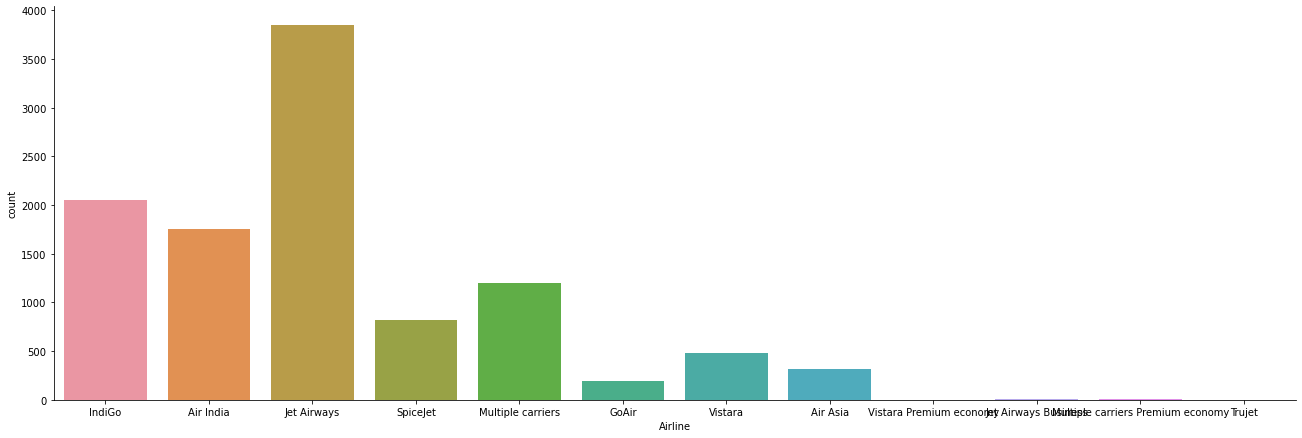

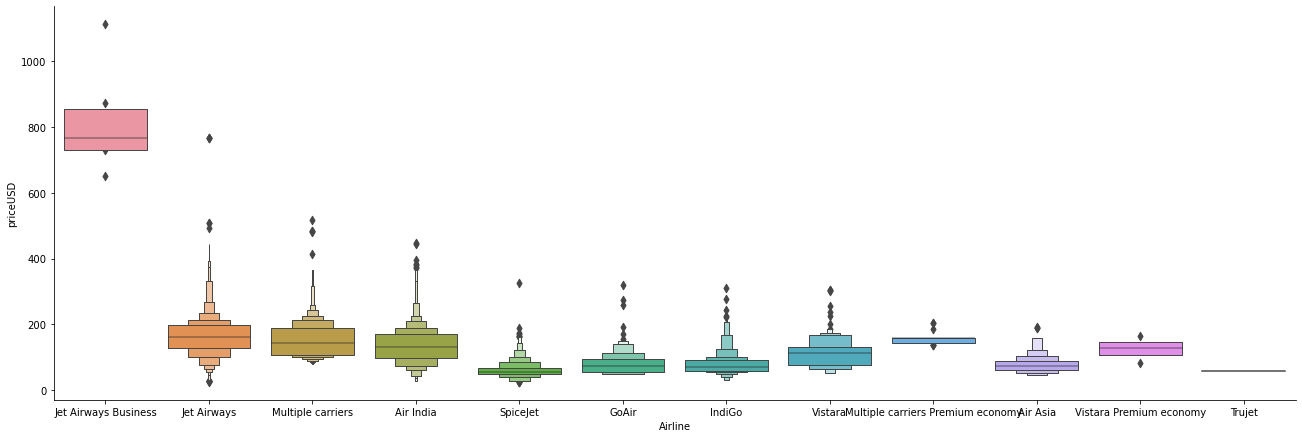

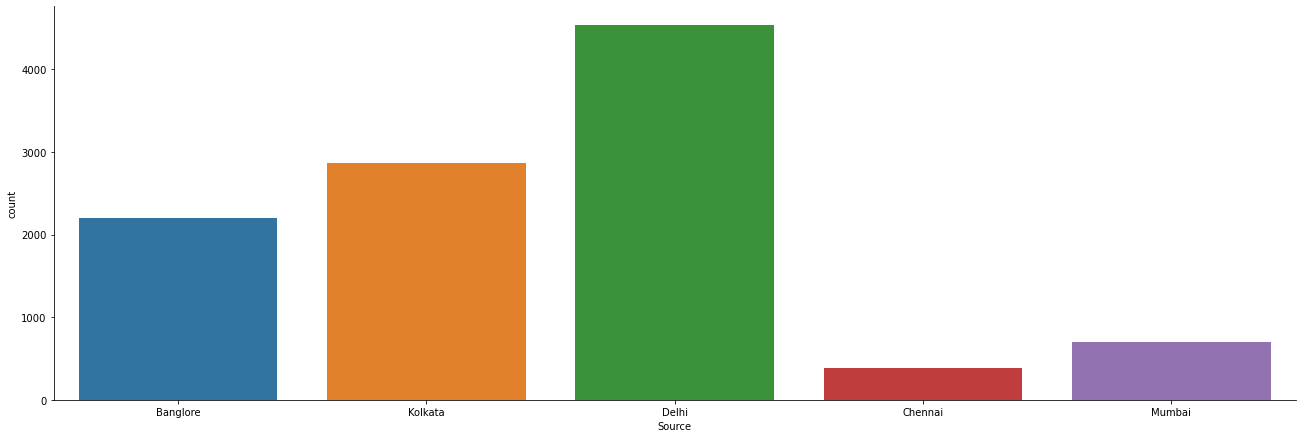

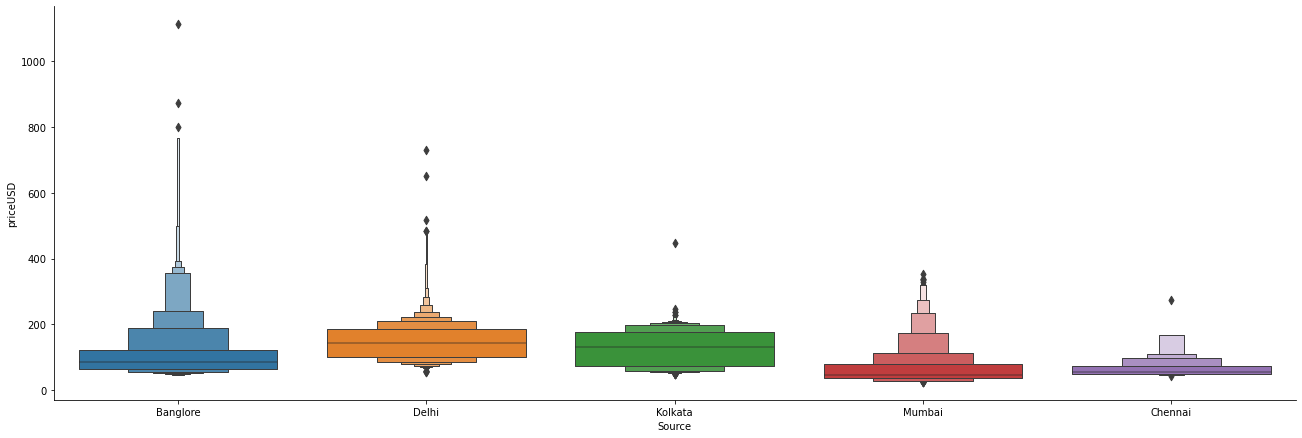

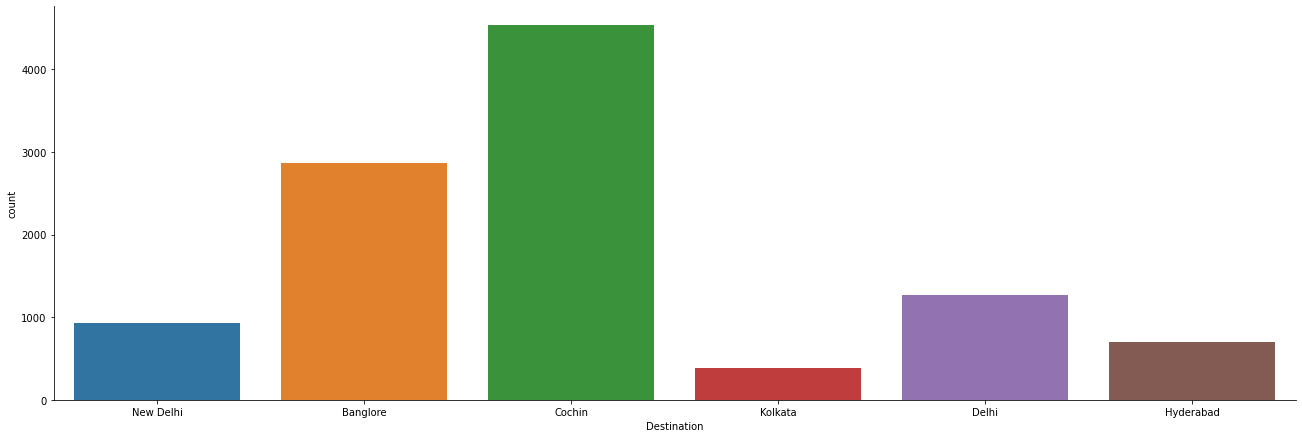

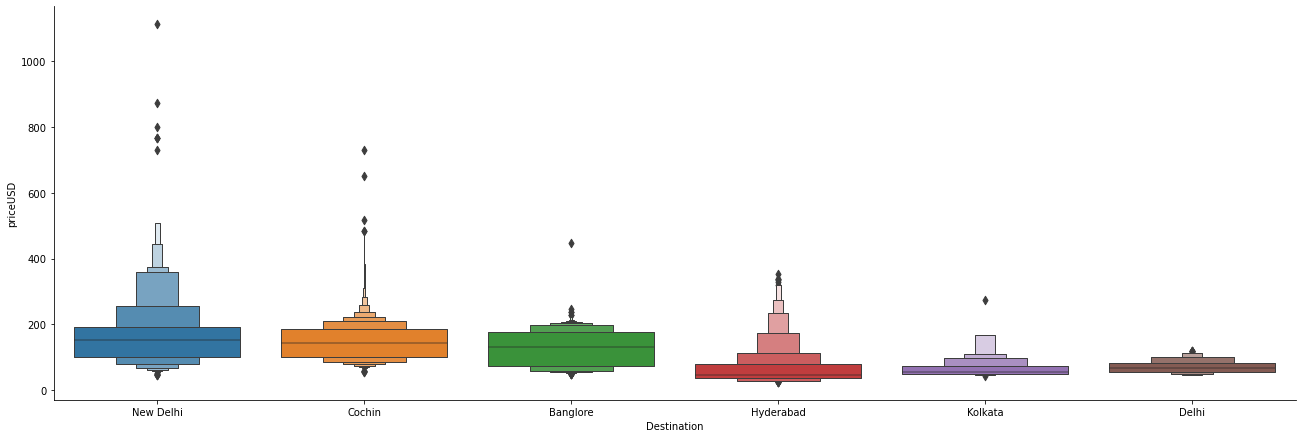

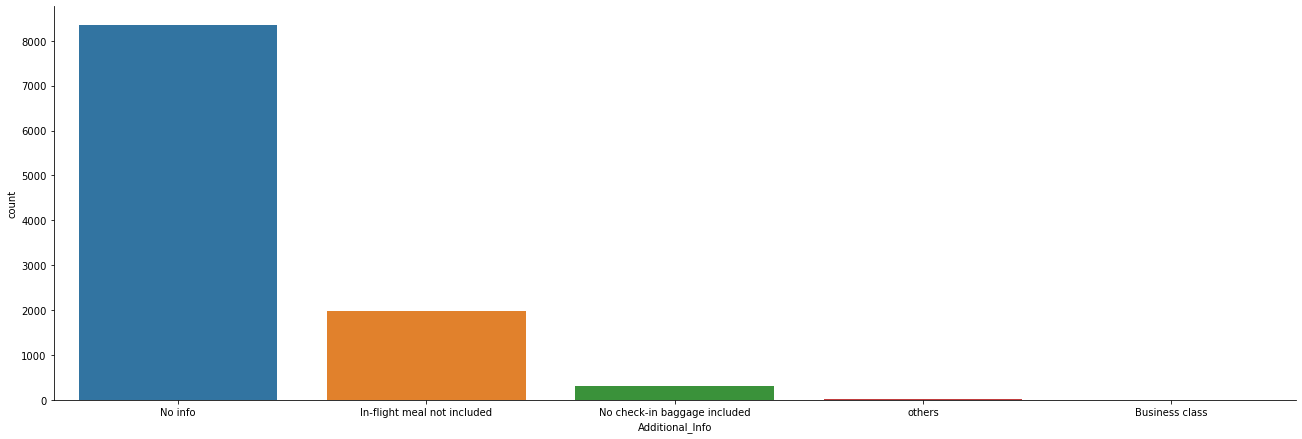

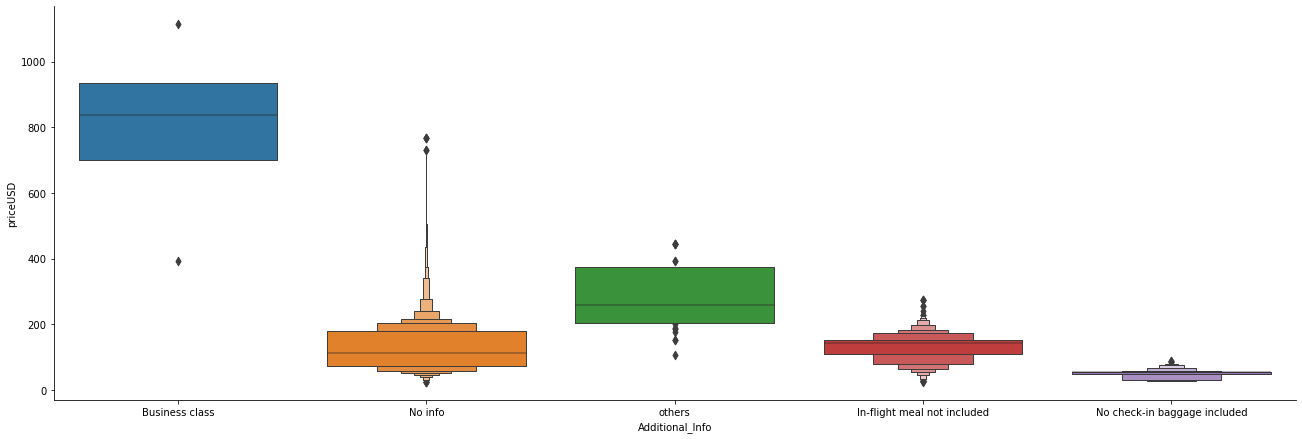

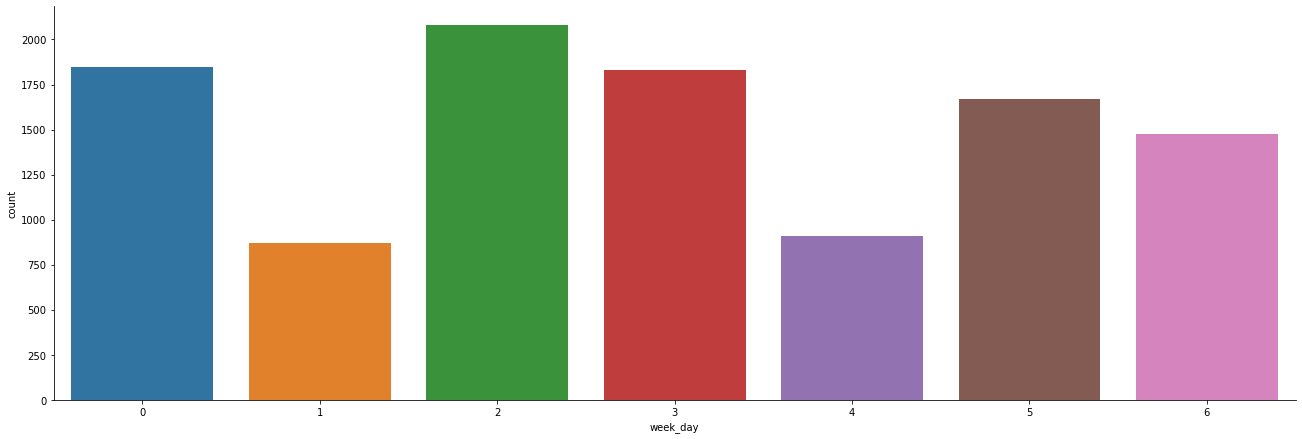

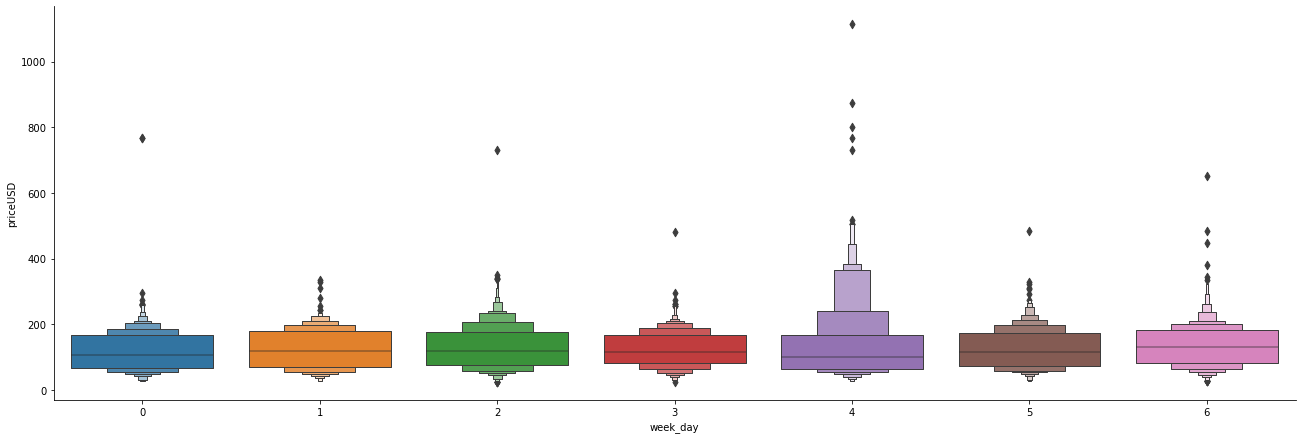

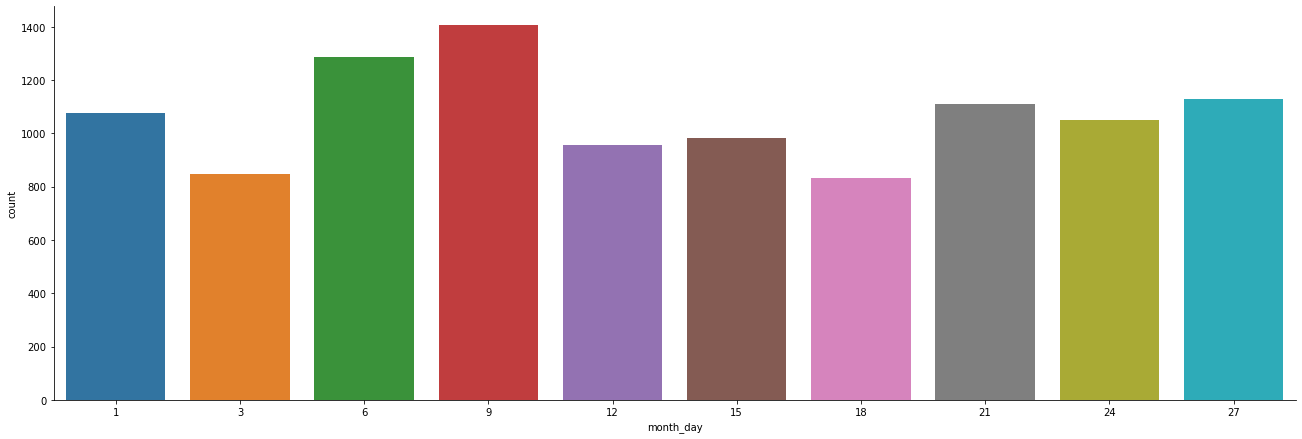

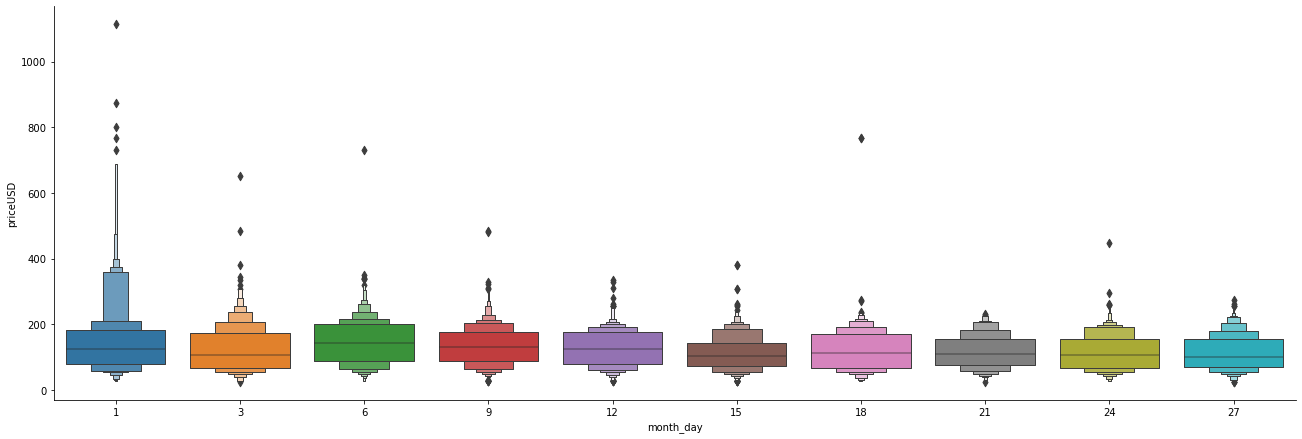

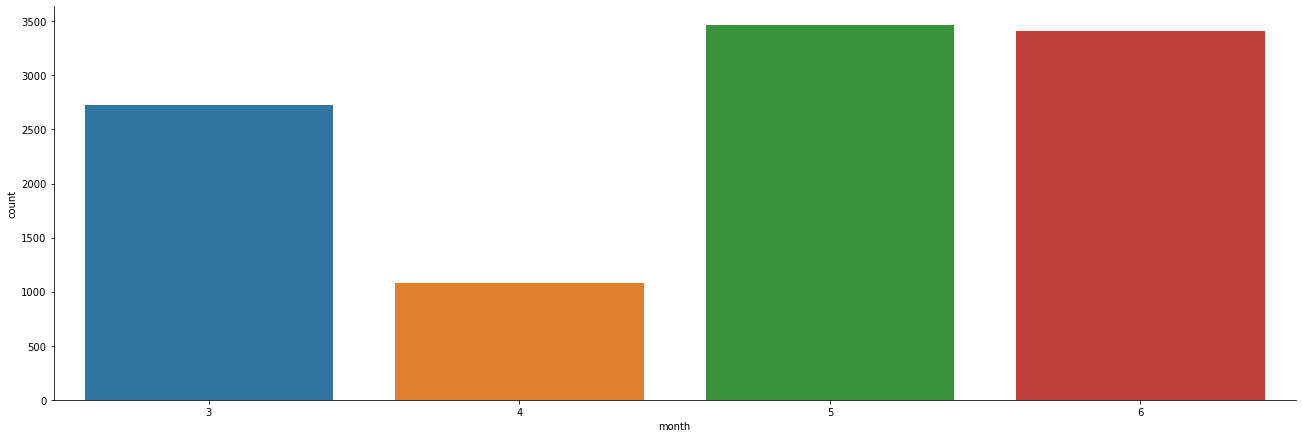

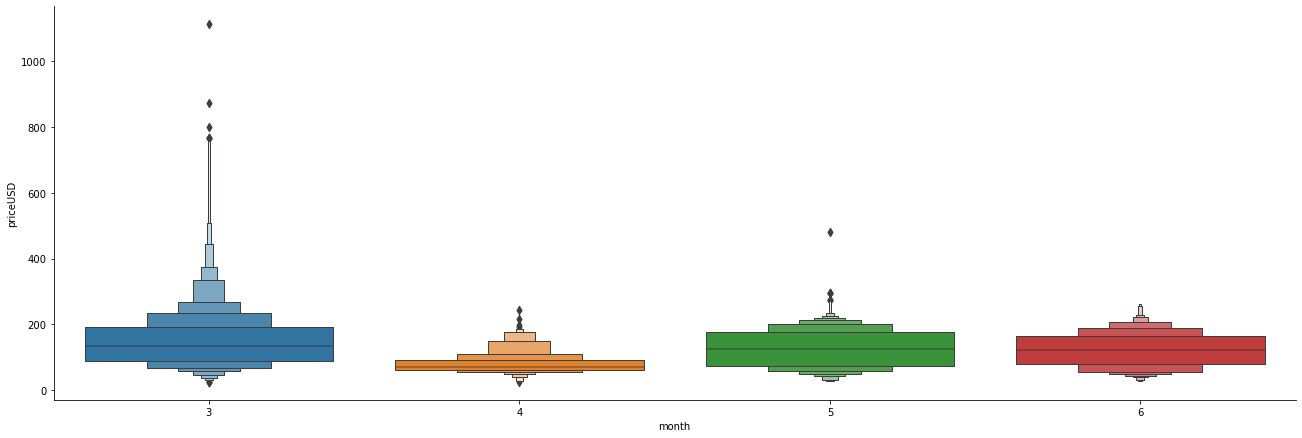

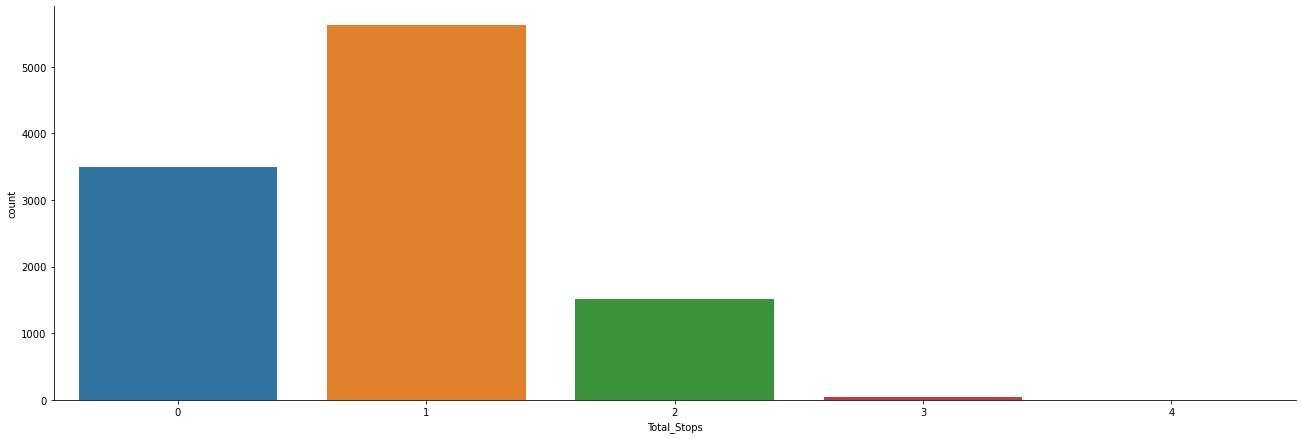

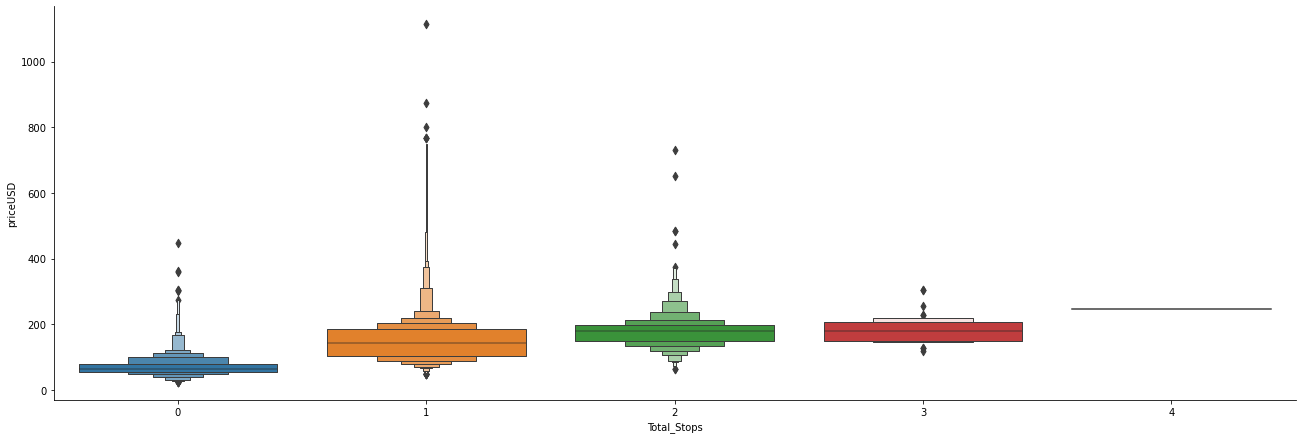

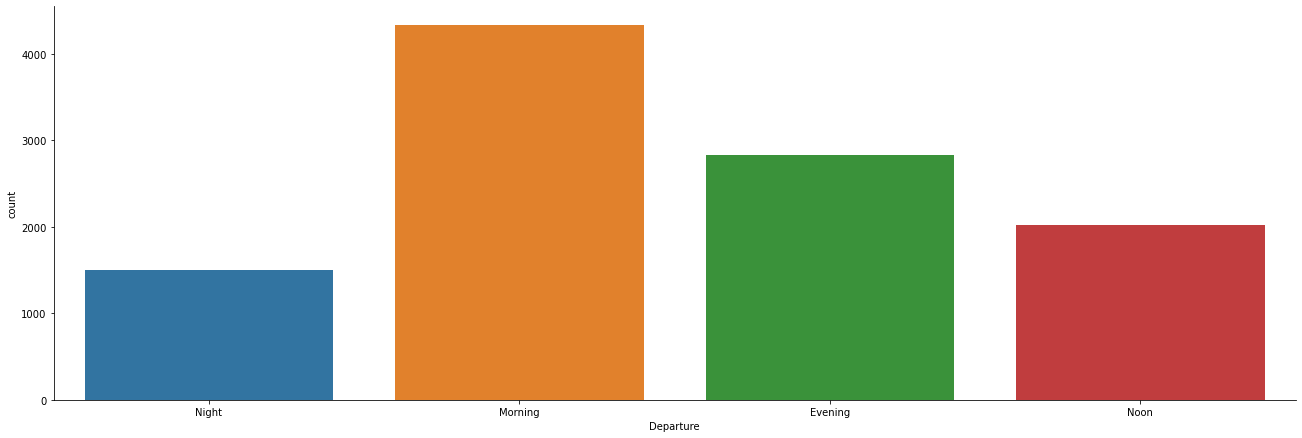

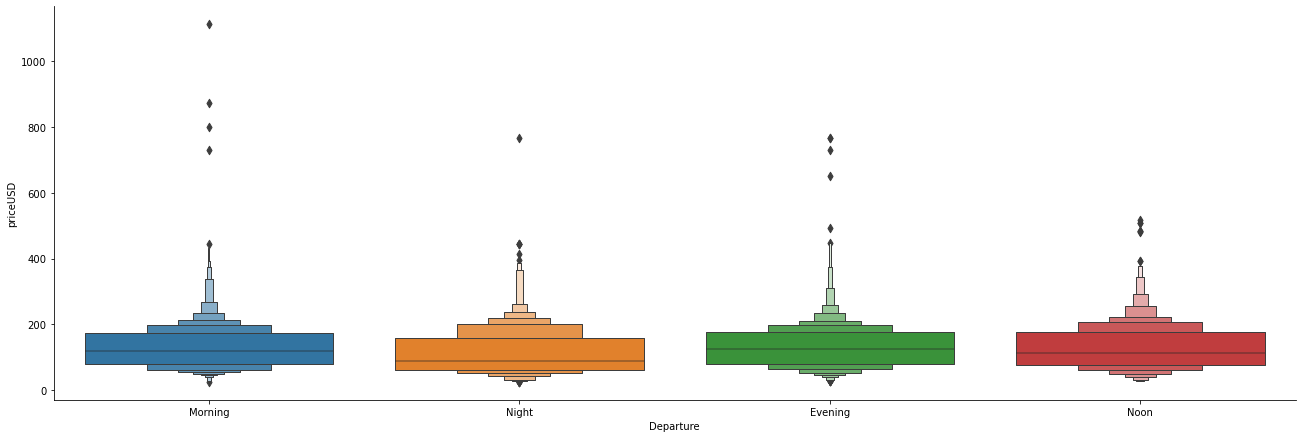

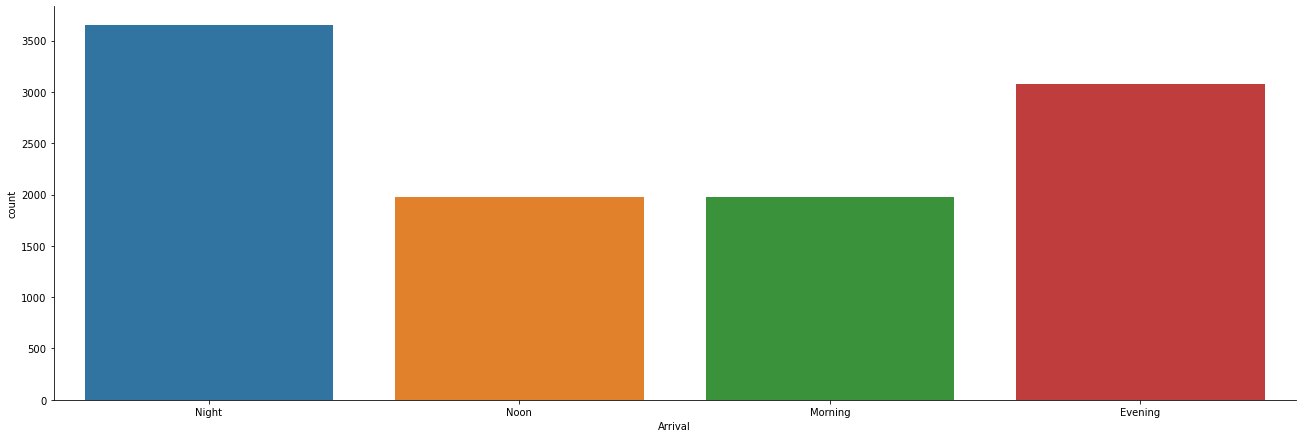

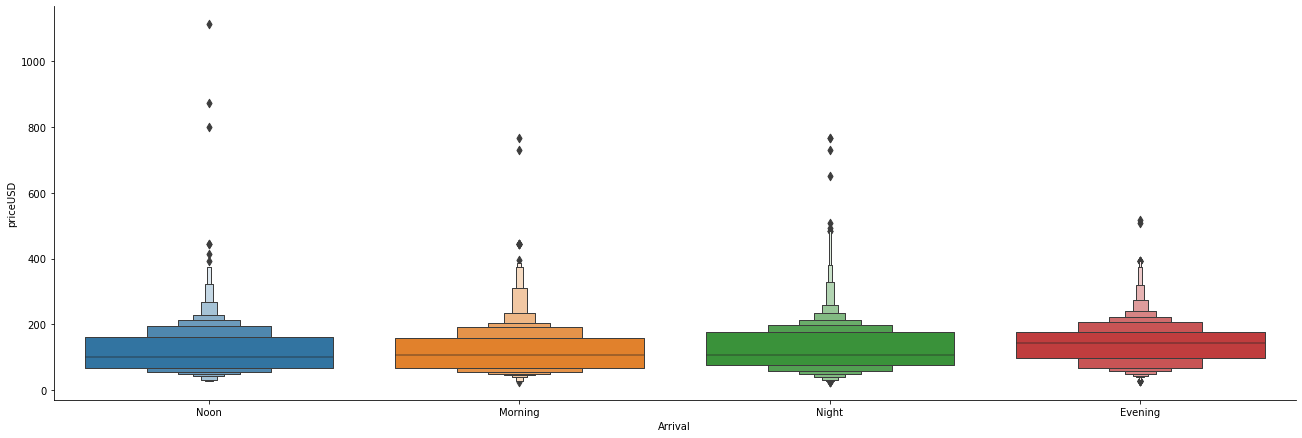

In [24]:
# Affiche les histogrammes du prix et count en fonction des autres features
for l in obj:
    sns.catplot(x = l, data = df, kind="count", height = 6, aspect=3)
    sns.catplot(y = "priceUSD", x = l, data = df.sort_values("priceUSD", ascending = False), kind="boxen", height = 6, aspect=3)

In [25]:
# Affiche le nom des colonnes du dataset
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'priceUSD', 'week_day', 'month_day', 'month',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'duration_in_min',
       'Arrival', 'Departure'],
      dtype='object')

In [26]:
# sort devient une liste des noms de certains features et les données du dataset sont remplacés par sort
sort = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'week_day', 'month_day', 'month',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'duration_in_min', 'Arrival', 'Departure', 'priceUSD']
df = df[sort]

In [27]:
Airline = df[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first = True)

Source = df[["Source"]]
Source = pd.get_dummies(Source, drop_first = True)

Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)

Add_Info = df[["Additional_Info"]]
Add_Info = pd.get_dummies(Add_Info, drop_first = True)

Departure = df[["Departure"]]
Departure = pd.get_dummies(Departure, drop_first = True)

Arrival = df[["Arrival"]]
Arrival = pd.get_dummies(Arrival, drop_first = True)

Route = df[["Route"]]
Route = pd.get_dummies(Route, drop_first = True)

In [28]:
# On concatène toutes ces donnés
pp = pd.concat([Airline, Source, Destination, Add_Info, Departure, Arrival, Route, df], axis = 1)

In [29]:
# Supprime les colonnes du même nom que celles dans to_drop
to_drop = ['Airline', 'Source', 'Destination', 'Additional_Info', 'Arrival', 'Departure', 'Route']
pp = pp.drop(columns=to_drop)

In [30]:
# Affiche le nom des colonnes de pp
pp.columns

Index(['Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara',
       ...
       'Total_Stops', 'week_day', 'month_day', 'month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'duration_in_min', 'priceUSD'],
      dtype='object', length=167)

In [31]:
# Affiche la matrice de corrélation des données
corrMatrix = pp.corr()

<AxesSubplot:>

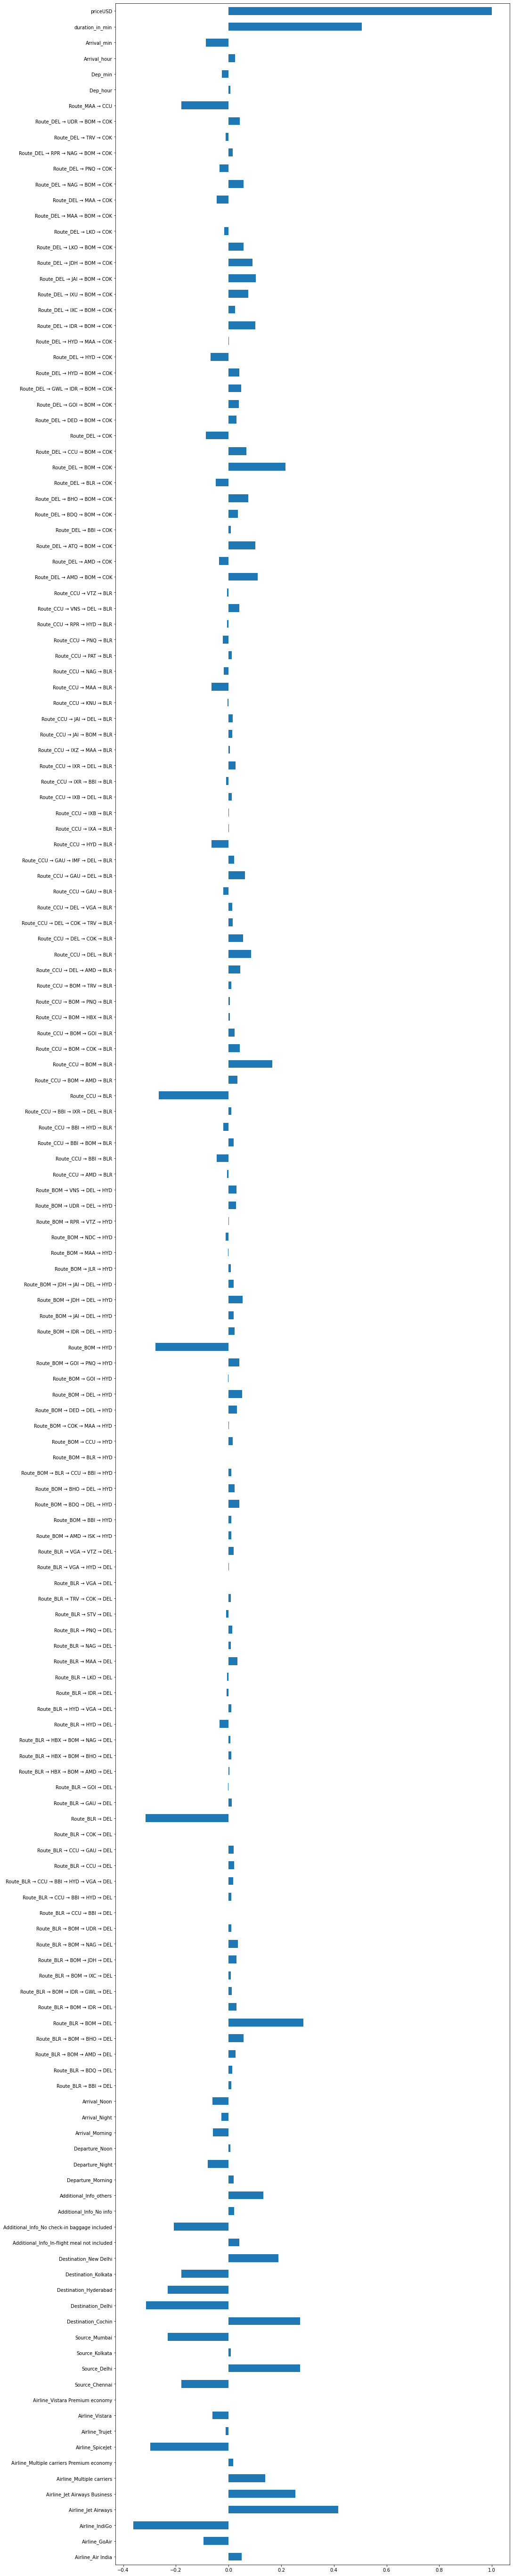

In [32]:
# Affiche les corrélations du prix en fonctions des autres features
plt.figure(figsize=(15,100))
corr = pd.Series(corrMatrix['priceUSD'].values, index=corrMatrix.columns)
corr.plot(kind='barh')

In [33]:
# Création d'un fichier csv qui correspond au dataset crée précedemment
pp.to_csv(r'pre_process_flight.csv', index = False)